In [1]:
import os
import numpy as np
import librosa
import pandas as pd
from keras.layers import Input
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras import models
from keras import layers
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Define constants or configuration variables
TRAIN_AUDIO_PATH = '/data/common_source/datasets/for-2seconds/training'
VALIDATION_AUDIO_PATH = '/data/common_source/datasets/for-2seconds/validation'
TESTING_AUDIO_PATH = '/data/common_source/datasets/for-2seconds/testing'
NUM_CLASSES = 2  # Number of classes (bonafide and spoof)
SAMPLE_RATE = 16000  # Sample rate of your audio files
DURATION = 5  # Duration of audio clips in seconds
N_MFCC = 13  # Number of MFCC coefficients
HOP_LENGTH = 512  # Hop length for MFCC extraction
WIN_LENGTH = 1024  # Window length for MFCC extraction


max_time_steps = 109  # Define the maximum time steps for your model


2023-10-15 23:37:22.815026: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-15 23:37:22.949946: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-15 23:37:23.418648: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jonat/miniconda3/lib/python3.11/site-packages/nvidia/cudnn/lib:/home/jonat/miniconda3/lib/:/home/jonat/miniconda3/lib/python3.11/site-packages/nvidia/cudnn/lib:/home/jonat/miniconda3/lib/:
2023-10-1

In [2]:
#MFCC Preproccessing and Labelling for FOR-2 Seconds Dataset
def extract_mfcc_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path)

        # Extract MFCC features using librosa
        mfcc = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=N_MFCC, hop_length=HOP_LENGTH, n_fft=WIN_LENGTH)

        # Ensure all MFCC features have the same width (time steps)
        if mfcc.shape[1] < max_time_steps:
            mfcc = np.pad(mfcc, ((0, 0), (0, max_time_steps - mfcc.shape[1])), mode='constant')
        else:
            mfcc = mfcc[:, :max_time_steps]
        
        return mfcc
    except Exception as e:
        print(f"Error encountered while processing file: {file_path}")
        return None

def process_audio_data(data_dir, output_prefix):
    data = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if not os.path.isdir(label_dir):
            continue
        for file_name in os.listdir(label_dir):
            if file_name.endswith('.wav'):
                file_path = os.path.join(label_dir, file_name)
                features = extract_mfcc_features(file_path)
                if features is not None:
                    data.append([features, label])

    # Shuffle the data
    np.random.shuffle(data)

    X_data = np.array([x[0] for x in data])
    y_labels = np.array([x[1] for x in data])

    # Optionally, display the first few rows of the dataset
    dataset_df = pd.DataFrame(data, columns=['feature', 'class_label'])
    print(dataset_df.head())

    # Save data and labels as .npy files
    data_filename = f"labels/{output_prefix}_data.npy"
    labels_filename = f"labels/{output_prefix}_labels.npy"
    np.save(data_filename, X_data)
    np.save(labels_filename, y_labels)

if __name__ == "__main__":
    process_audio_data(TRAIN_AUDIO_PATH, "train")
    process_audio_data(VALIDATION_AUDIO_PATH, "validation")
    process_audio_data(TESTING_AUDIO_PATH, "test")


2023-10-15 23:32:28.026177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-15 23:32:28.154739: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2023-10-15 23:32:28.610216: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jonat/miniconda3/lib/python3.11/site-packages/nvidia/cudnn/lib:/home/jonat/miniconda3/lib/:/home/jonat/miniconda3/lib/python3.11/site-packages/nvidia/cudnn/lib:/home/jonat/miniconda3/lib/:
2023-10-15 23:32:28.610320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jonat/miniconda3/lib/python3.11/site-packages/nvidia/cudnn/lib:/home/jonat/miniconda3/lib/:/home/jonat/miniconda3/lib/python3.11/site-packages/nvidia/cudnn/lib:/home/jonat/miniconda3/lib/:
2023-10-15 23:32:28.610327: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot d

                                             feature class_label
0  [[-292.37384, -297.99347, -230.77238, -230.241...        real
1  [[-291.8534, -376.04398, -314.4469, -266.3377,...        fake
2  [[-198.22737, -191.6962, -326.66605, -307.3635...        real
3  [[-315.32645, -382.9136, -355.21204, -339.6149...        fake
4  [[-192.15558, -170.27231, -179.30447, -266.585...        real
                                             feature class_label
0  [[-231.43066, -279.91272, -280.05536, -291.478...        real
1  [[-300.52103, -277.91156, -255.6104, -256.7836...        fake
2  [[-155.39638, -181.88696, -179.5476, -166.2609...        real
3  [[-291.72974, -249.66345, -234.02666, -265.211...        fake
4  [[-174.49696, -254.71776, -269.73917, -270.478...        real
                                             feature class_label
0  [[-218.62175, -270.18616, -292.11826, -274.697...        real
1  [[-291.93954, -218.97017, -219.31297, -233.617...        fake
2  [[-200.13414, -144.293

In [6]:
# causal conv
def __causal_gated_conv1D(x=None, filters=16, length=6, strides=1):
    def causal_gated_conv1D(x, filters, length, strides):
        x_in_1 = layers.Conv1D(filters=filters // 2,
                               kernel_size=length,
                               dilation_rate=strides, 
                               strides=1,
                               padding="causal")(x)
        x_sigmoid = layers.Activation(activation="sigmoid")(x_in_1)

        x_in_2 = layers.Conv1D(filters=filters // 2,
                               kernel_size=length,
                               dilation_rate=strides,  
                               strides=1,
                               padding="causal")(x)
        x_tanh = layers.Activation(activation="tanh")(x_in_2)

        x_out = layers.Multiply()([x_sigmoid, x_tanh])

        return x_out

    if x is None:
        return lambda _x: causal_gated_conv1D(x=_x, filters=filters, length=length, strides=strides)
    else:
        return causal_gated_conv1D(x=x, filters=filters, length=length, strides=strides)


def Net(input_shape, classes, width_multiply=1):
    _x_in = layers.Input(shape=input_shape)

    # 1 block
    _x_up = __causal_gated_conv1D(filters=16 * width_multiply, length=3)(_x_in)
    _x_down = __causal_gated_conv1D(filters=16 * width_multiply, length=6)(_x_in)
    _x = layers.Concatenate()([_x_up, _x_down])

    # 2 block
    _x_up = __causal_gated_conv1D(filters=8 * width_multiply, length=3)(_x)
    _x_down = __causal_gated_conv1D(filters=8 * width_multiply, length=6)(_x)
    _x = layers.Concatenate()([_x_up, _x_down])

    # 3 block
    _x_up = __causal_gated_conv1D(filters=8 * width_multiply, length=3)(_x)
    _x_down = __causal_gated_conv1D(filters=8 * width_multiply, length=6)(_x)
    _x_concat = layers.Concatenate()([_x_up, _x_down])

    _x = layers.Add()([_x, _x_concat])

    # 4 block
    _x_loop1 = __causal_gated_conv1D(filters=16 * width_multiply, length=3, strides=3)(_x)
    _x = layers.Add()([_x, _x_loop1])

    # 5 block
    _x_loop2 = __causal_gated_conv1D(filters=16 * width_multiply, length=3, strides=2)(_x)
    _x = layers.Add()([_x, _x_loop2])

    # 6 block
    _x_loop3 = __causal_gated_conv1D(filters=16 * width_multiply, length=3, strides=2)(_x)
    _x = layers.Add()([_x, _x_loop3])

    # 7 block
    _x_forward = __causal_gated_conv1D(filters=16 * width_multiply, length=3, strides=2)(_x)

    # 8 block
    _x_loop4 = __causal_gated_conv1D(filters=32 * width_multiply, length=3, strides=2)(_x)

    # output
    _x = layers.Concatenate()([_x_loop2, _x_loop3, _x_forward, _x_loop4])
    _x = layers.Conv1D(filters=classes, kernel_size=1)(_x)
    _x = layers.GlobalAveragePooling1D()(_x)
    _x = layers.Activation("softmax")(_x)

    model = models.Model(inputs=_x_in, outputs=_x)

    return model

model = Net(input_shape=(N_MFCC, max_time_steps), classes=2, width_multiply=2)

# Compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
# Display model architecture summary
model.summary()



# Load the training data
X_train = np.load('labels/train_data.npy')
y_train = np.load('labels/train_labels.npy')

# Load the validation data (
X_validation = np.load('labels/validation_data.npy')
y_validation = np.load('labels/validation_labels.npy')

# Load the test data
X_test = np.load('labels/test_data.npy')
y_test = np.load('labels/test_labels.npy')

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Shuffle the validation data (if needed)
X_validation, y_validation = shuffle(X_validation, y_validation, random_state=42)

# Shuffle the test data
X_test, y_test = shuffle(X_test, y_test, random_state=42)

# print(f"X_train shape: {X_train.shape}")
# print(f"X_validation shape: {X_validation.shape}")
# print(f"X_test shape: {X_test.shape}"
print(f"y_train shape: {y_train.shape}")
print(f"y_validation shape: {y_validation.shape}")
print(f"y_test shape: {y_test.shape}")


# Train the model

le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_validation_encoded = to_categorical(le.transform(y_validation))
y_test_encoded = to_categorical(le.transform(y_test))



# Train the model
num_epochs = 30
num_batch_size = 32

history = model.fit(X_train, y_train_encoded, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_validation, y_validation_encoded), verbose=1)

# Evaluate the model on the final test set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


model.save('models/agamjeet-model.h5')

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 13, 109)]    0           []                               
                                                                                                  
 conv1d_46 (Conv1D)             (None, 13, 16)       5248        ['input_3[0][0]']                
                                                                                                  
 conv1d_47 (Conv1D)             (None, 13, 16)       5248        ['input_3[0][0]']                
                                                                                                  
 conv1d_48 (Conv1D)             (None, 13, 16)       10480       ['input_3[0][0]']                
                                                                                            

y_train shape: (13956,)
y_validation shape: (2826,)
y_test shape: (1088,)
Epoch 1/30
437/437 [==============================] - 11s 21ms/step - loss: 0.5437 - accuracy: 0.7003 - val_loss: 0.4309 - val_accuracy: 0.7951
Epoch 2/30
437/437 [==============================] - 9s 20ms/step - loss: 0.3652 - accuracy: 0.8391 - val_loss: 0.3430 - val_accuracy: 0.8524
Epoch 3/30
437/437 [==============================] - 9s 20ms/step - loss: 0.3137 - accuracy: 0.8697 - val_loss: 0.3196 - val_accuracy: 0.8595
Epoch 4/30
437/437 [==============================] - 9s 20ms/step - loss: 0.2810 - accuracy: 0.8831 - val_loss: 0.2970 - val_accuracy: 0.8758
Epoch 5/30
437/437 [==============================] - 9s 20ms/step - loss: 0.2504 - accuracy: 0.9007 - val_loss: 0.2957 - val_accuracy: 0.8754
Epoch 6/30
437/437 [==============================] - 9s 20ms/step - loss: 0.2436 - accuracy: 0.9031 - val_loss: 0.2779 - val_accuracy: 0.8907
Epoch 7/30
437/437 [==============================] - 9s 20ms/step 

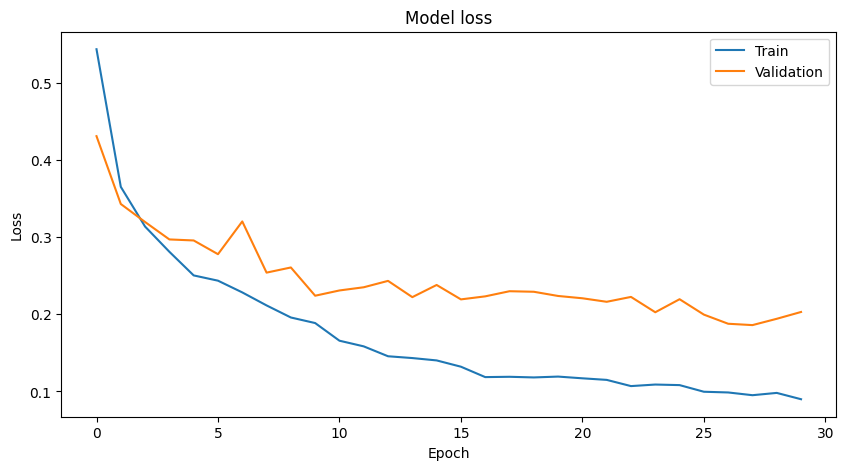

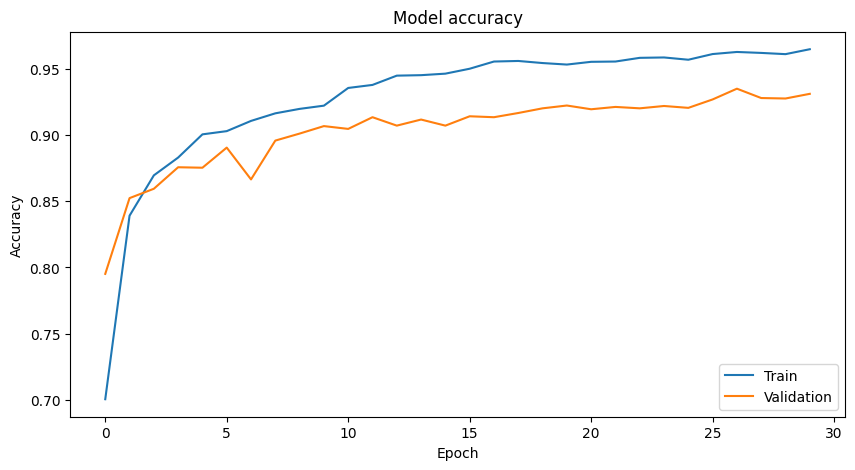

: 

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
shape = load_model()